<a href="https://colab.research.google.com/github/luckguy/SS2022/blob/main/SS07_impulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Characterization of Discrete Systems in the Time Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## 脈衝響應

輸入訊號為單位脈衝訊號所得的輸出訊號
\begin{equation}
h[n] = \mathcal{H} \left\{ \delta[n] \right\}
\end{equation}


### Output 輸出訊號

The response $y[k] = \mathcal{H} \{ x[k] \}$ of an LTI system to an arbitrary input signal $x[k]$ is derived. By applying the [sifting-property of the discrete Dirac impulse](../discrete_signals/standard_signals.ipynb#Dirac-Impulse), the input signal can be represented as


\begin{equation}
h[n] = \mathcal{H} \left\{ \delta[n] \right\}
\end{equation}

If the system is time-invariant, the response to a shifted Dirac impulse is $\mathcal{H} \left\{ \delta[k-\kappa]) \right\} = h[k-\kappa]$. Hence, for a discrete LTI system we finally get

\begin{equation}
y[k] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot h[k-\kappa] = y[k] = x[k] * h[k]
\end{equation}

This operation is termed as linear [*convolution*](https://en.wikipedia.org/wiki/Convolution) and commonly abbreviated by $*$. The properties of an LTI system are entirely characterized by its impulse response. The response $y[k]$ of a system to an arbitrary input signal $x[k]$ is given by the convolution of the input signal $x[k]$ with its impulse response $h[k]$.

### Relation to Difference Equation

The impulse response $h[k] = \mathcal{H} \{ \delta[k] \}$ is the response of an LTI system to an Dirac impulse at the input. It can be derived from the coefficients of a [linear differential equation representing the LTI system](difference_equation.ipynb) by computing the output signal for the input signal $x[k] = \delta[k]$. Introducing this into the [solution of the difference equation](difference_equation.ipynb#Computation-of-the-Output-Signal) yields

\begin{equation}
h[k] = \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \; \delta[k-m] - \sum_{n=1}^{N} a_n \; h[k-n] \right)
\end{equation}

### 有限脈衝響應系統

Let's consider the case of a [non-recursive system](difference_equation.ipynb#Recursive-and-Non-Recursive-Systems) with $a_n = 0$ for $n > 0$. Without loss of generality it can be assumed that $a_0 = 1$, since $\frac{1}{a_0}$ can be incorporated into the other coefficients by dividing them through $a_0$. The impulse response is given as

\begin{equation}
h[n] = \sum_{k=0}^{M} b_m \; \delta[n-m] = \begin{cases} b_n & \text{for } 0 \leq n < M \\ 0 & \text{otherwise} \end{cases}
\end{equation}



**Example - 移動平均系統**

According to above findings, the impulse response of the [moving average filter](difference_equation.ipynb#Moving-Average) is given as

\begin{equation}
h[k] = \frac{1}{N} \cdot \text{rect}_N[k]
\end{equation}

As alternative to the [solution of the difference equation illustrated before](difference_equation.ipynb#Moving-Average), the output signal $y[k] = \mathcal{H} \{ y[k] \}$ is computed by convolution of the (same) input signal.

(-0.2, 0.30000000000000004)

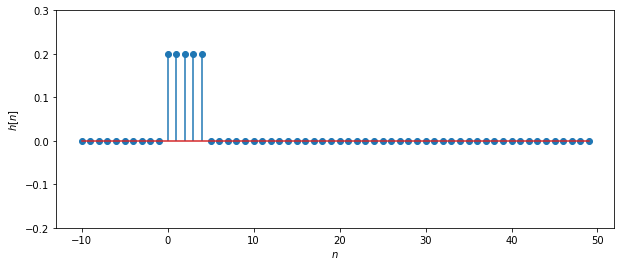

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

def dirac(k):
    return np.where(k==0,1,0)

# 定義移動平均器
N = 5   

a=[1]
b=np.ones(N)/N  # y[n]=x[n]+x[n-1]+...+x[n-4]

# 定義脈衝訊號
n = np.arange(-10, 50)
x=dirac(n)
h=signal.lfilter(b,a,x)  # 計算脈衝訊號的輸出，得到脈衝響應

plt.figure(figsize=(10, 4))
plt.stem(n, h,use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel(r'$h[n]$')
plt.ylim(-0.2, 1/N+0.1)

### 無窮脈衝響應系統


**Example: 一階遞迴系統**
\begin{equation}
  y[n]-a y[n]= b x[n]
\end{equation}

(-0.2, 1.2)

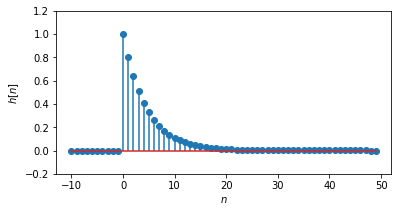

In [4]:
# 一階遞迴系統
# 定義 y[n]=0.8 y[n-1]+x[n]
a = [1.0, -0.8]
b = [1.0]

x=dirac(n)
h = signal.lfilter(b, a, x)  # 計算脈衝訊號的輸出，得到脈衝響應

plt.figure(figsize=(6, 3))
plt.stem(n, h,use_line_collection=True) 
plt.xlabel('$n$')
plt.ylabel(r'$h[n]$')
plt.ylim(-0.2,1.2)